In [1]:
#liz stacy ethan code
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import os

col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]

for i in range(1, 33):
    col_names.append(f"Sp{i}")

file = 'A2PM.csv'

df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
df = df.set_index('Index')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df = df[df["MonStatus"] == 1]


month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
df['DateM'] = df['DateM'].str[:3].map(month_map)
df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

df.insert(0, 'Day', df['Time'].dt.day.map(day_map))

#df.to_csv('steatodaA.csv')
display(df)

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-03-20 11:04:00,1,0,0,2,2,15,0,8,...,0,0,2,0,0,0,0,0,0,0
2,1,2024-03-20 11:05:00,1,0,0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2024-03-20 11:06:00,1,0,0,3,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2024-03-20 11:07:00,1,0,0,0,1,3,0,0,...,1,0,1,0,0,0,0,0,0,0
5,1,2024-03-20 11:08:00,1,0,0,0,1,4,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,8,2024-03-27 10:23:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10041,8,2024-03-27 10:24:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10042,8,2024-03-27 10:25:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#function to filter threshold
import pandas as pd

def filter_and_merge(df, threshold=0):
    additional_columns = df.columns[:3]
    filtered_dfs = []

    for day in range(1, 9):  
        day_df = df[df['Day'] == day] 
        count_mov = day_df.filter(like="Sp")  
        x = count_mov.sum(axis=0)  
        z = x > threshold  
        columns_to_keep = z[z].index 
        
        all_columns_to_keep = list(additional_columns) + list(columns_to_keep)
        filtered_df = day_df[all_columns_to_keep]
        filtered_dfs.append(filtered_df)

    merged_df = pd.concat(filtered_dfs)
    merged_df1 = merged_df.dropna(axis=1)
    
    return merged_df1
    
merged_df = filter_and_merge(df)
display(merged_df)

,Day,Time,Light,Sp3,Sp4,Sp9,Sp10,Sp12,Sp13,Sp14,Sp15,Sp16,Sp18,Sp19,Sp21,Sp22,Sp23,Sp25
Index,,,,,,,,,,,,,,,,,,
1,1,2024-03-20 11:04:00,1,2,2,5,0,0,0,0,0,1,4,3,1,3,0,2
2,1,2024-03-20 11:05:00,1,5,1,8,2,0,0,3,1,4,11,4,1,2,0,0
3,1,2024-03-20 11:06:00,1,3,1,8,1,0,0,5,0,1,1,3,1,5,0,0
4,1,2024-03-20 11:07:00,1,0,1,12,2,0,0,0,1,6,2,3,3,0,1,1
5,1,2024-03-20 11:08:00,1,0,1,10,0,0,0,4,0,3,5,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,8,2024-03-27 10:23:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10041,8,2024-03-27 10:24:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10042,8,2024-03-27 10:25:00,1,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0


In [3]:
import pandas as pd
import numpy as np

def entrainment(data, column):
    if column not in data.columns:
        return False
    
    dflight = data[data['Light'] == 1][column]
    dfdark = data[data['Light'] == 0][column]
    
    lightmean = np.mean(dflight)
    darkmean = np.mean(dfdark)
    
    if darkmean == 0:
        return False
    
    diff = lightmean / darkmean
    return diff > 0.25

spiders = ["Sp"+str(i) for i in range(1, 33)]

entrainment_results = []

for spider_column in spiders:
    if spider_column in merged_df.columns:  # Check if the column exists
        entrainment_result = entrainment(merged_df, spider_column)
        entrainment_results.append((spider_column, entrainment_result))

results_df = pd.DataFrame(entrainment_results, columns=['Spider', 'Entrained'])

# Get the list of spiders that have entrainment True
entrained_spiders = results_df[results_df['Entrained'] == True]['Spider'].tolist()

print("Results DataFrame:")
print(results_df)
print("\nList of spiders with entrainment True:")
print(entrained_spiders)


Results DataFrame:
   Spider  Entrained
0     Sp3       True
1     Sp4       True
2     Sp9       True
3    Sp10       True
4    Sp12       True
5    Sp13       True
6    Sp14       True
7    Sp15       True
8    Sp16       True
9    Sp18      False
10   Sp19       True
11   Sp21      False
12   Sp22       True
13   Sp23       True
14   Sp25      False

List of spiders with entrainment True:
['Sp3', 'Sp4', 'Sp9', 'Sp10', 'Sp12', 'Sp13', 'Sp14', 'Sp15', 'Sp16', 'Sp19', 'Sp22', 'Sp23']


In [4]:
finaldf = []

additional_columns = merged_df.columns[:3]  # Assuming the first three columns are additional columns
columns_to_keep = entrained_spiders
        
all_columns_to_keep = list(additional_columns) + list(columns_to_keep)
filtered_df = merged_df[all_columns_to_keep]  # Use merged_df here, not entrained_spiders

finaldf.append(filtered_df)

merged_dfx = pd.concat(finaldf)
merged_dfx1 = merged_dfx.dropna(axis=1)  # Use merged_dfx here, not merged_df

display(merged_dfx1)

,Day,Time,Light,Sp3,Sp4,Sp9,Sp10,Sp12,Sp13,Sp14,Sp15,Sp16,Sp19,Sp22,Sp23
Index,,,,,,,,,,,,,,,
1,1,2024-03-20 11:04:00,1,2,2,5,0,0,0,0,0,1,3,3,0
2,1,2024-03-20 11:05:00,1,5,1,8,2,0,0,3,1,4,4,2,0
3,1,2024-03-20 11:06:00,1,3,1,8,1,0,0,5,0,1,3,5,0
4,1,2024-03-20 11:07:00,1,0,1,12,2,0,0,0,1,6,3,0,1
5,1,2024-03-20 11:08:00,1,0,1,10,0,0,0,4,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,8,2024-03-27 10:23:00,1,0,0,0,0,0,0,0,0,0,0,0,0
10041,8,2024-03-27 10:24:00,1,0,0,0,0,0,0,0,0,0,0,0,0
10042,8,2024-03-27 10:25:00,1,0,0,0,0,0,0,0,0,0,0,14,0


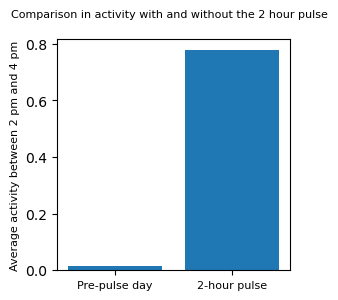

In [5]:
#filter day 5 and day 4 (the nile research did day the day of pulse and the day before)
#I can also filter all days without pulse and average them and compare with the day WITH pulse 
dayfour = df.loc[df['Day'] == 4]
dayfive = df.loc[df['Day'] == 5]
dayfourfive = pd.concat([dayfour, dayfive])
dayfourfive
# filter time (2 pm - 4 pm in this case) - fix this because is about 2 hours but not exactly 2 hours (look if light or dark)
index = dayfourfive.loc[(dayfourfive == '2024-03-23 14:00:00').any(axis=1)].index[0]
index1 = dayfourfive.loc[(dayfourfive == '2024-03-23 16:00:00').any(axis=1)].index[0]

index2 = dayfourfive.loc[(dayfourfive == '2024-03-24 14:00:00').any(axis=1)].index[0]
index3 = dayfourfive.loc[(dayfourfive == '2024-03-24 16:00:00').any(axis=1)].index[0]

dayfourslice = dayfourfive.loc[index:index1, :]
dayfiveslice = dayfourfive.loc[index2:index3, :]

twotofourslice = pd.concat([dayfourslice, dayfiveslice])
# filter individual spider 
spider1_day4 = dayfourslice['Sp21']
spider1_day5 = dayfiveslice['Sp21']

# average it out for both pulse and no pulse 
meanday4 = spider1_day4.mean()
meanday5 = spider1_day5.mean()
days = ['Pre-pulse day', '2-hour pulse']

# plotting
plt.figure(figsize=(3,3))

plt.bar(days, [meanday4, meanday5]) 

plt.suptitle('Comparison in activity with and without the 2 hour pulse', fontsize=8)
plt.ylabel('Average activity between 2 pm and 4 pm', fontsize=8)
plt.xticks(fontsize=8)
plt.show() 

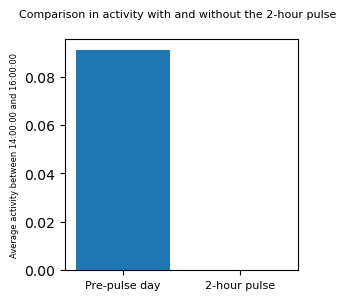

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_and_compare_activity(df, spider_col, day_pulse, day_pre_pulse, start_hour, end_hour):
    pre_pulse_date = df.loc[df['Day'] == day_pre_pulse, 'Time'].dt.date.unique()[0]
    pulse_date = df.loc[df['Day'] == day_pulse, 'Time'].dt.date.unique()[0]
    
    start_time_pre_pulse = pd.to_datetime(f"{pre_pulse_date} {start_hour}")
    end_time_pre_pulse = pd.to_datetime(f"{pre_pulse_date} {end_hour}")
    start_time_pulse = pd.to_datetime(f"{pulse_date} {start_hour}")
    end_time_pulse = pd.to_datetime(f"{pulse_date} {end_hour}")
    
    day_pre = df.loc[df['Day'] == day_pre_pulse]
    day_pulse = df.loc[df['Day'] == day_pulse]
    
    day_pre_filtered = day_pre[(day_pre['Time'] >= start_time_pre_pulse) & (day_pre['Time'] <= end_time_pre_pulse)]
    day_pulse_filtered = day_pulse[(day_pulse['Time'] >= start_time_pulse) & (day_pulse['Time'] <= end_time_pulse)]
    
    spider_day_pre = day_pre_filtered[spider_col]
    spider_day_pulse = day_pulse_filtered[spider_col]
    
    mean_day_pre = spider_day_pre.mean()
    mean_day_pulse = spider_day_pulse.mean()
    
    means_df = pd.DataFrame({
        'Day': ['Pre-pulse day', '2-hour pulse'],
        'Mean Activity': [mean_day_pre, mean_day_pulse]
    })
    
    # Plot the results
    plt.figure(figsize=(3, 3))
    plt.bar(means_df['Day'], means_df['Mean Activity'])
    plt.suptitle('Comparison in activity with and without the 2-hour pulse', fontsize=8)
    plt.ylabel('Average activity between {} and {}'.format(start_hour, end_hour), fontsize=6)
    plt.xticks(fontsize=8)
    plt.show()
    
    return means_df

spider_col = 'Sp9'  
day_pulse = 5 
day_pre_pulse = 4  
start_hour = '14:00:00' 
end_hour = '16:00:00'  

df['Time'] = pd.to_datetime(df['Time'])

means_df = filter_and_compare_activity(df, spider_col, day_pulse, day_pre_pulse, start_hour, end_hour)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def filter_and_compare_activity(df, day_pulse, day_pre_pulse, start_hour, end_hour):
    # Get the unique dates for the specified days
    pre_pulse_date = df.loc[df['Day'] == day_pre_pulse, 'Time'].dt.date.unique()[0]
    pulse_date = df.loc[df['Day'] == day_pulse, 'Time'].dt.date.unique()[0]
    
    # Construct start and end times with the correct dates
    start_time_pre_pulse = pd.to_datetime(f"{pre_pulse_date} {start_hour}")
    end_time_pre_pulse = pd.to_datetime(f"{pre_pulse_date} {end_hour}")
    start_time_pulse = pd.to_datetime(f"{pulse_date} {start_hour}")
    end_time_pulse = pd.to_datetime(f"{pulse_date} {end_hour}")
    
    # Filter the days
    day_pre = df.loc[df['Day'] == day_pre_pulse]
    day_pulse = df.loc[df['Day'] == day_pulse]
    
    # Filter the time range for the specified days
    day_pre_filtered = day_pre[(day_pre['Time'] >= start_time_pre_pulse) & (day_pre['Time'] <= end_time_pre_pulse)]
    day_pulse_filtered = day_pulse[(day_pulse['Time'] >= start_time_pulse) & (day_pulse['Time'] <= end_time_pulse)]
    
    # Initialize a list to store mean activity data for each spider
    spider_means = []
    
    # Loop through each spider column
    spider_columns = [col for col in df.columns if col.startswith('Sp')]
    
    # Calculate the number of rows and columns for the grid
    num_spiders = len(spider_columns)
    num_cols = 3  # You can adjust this value based on how many columns you want in the grid
    num_rows = (num_spiders + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array to easily index it
    
    for idx, spider_col in enumerate(spider_columns):
        # Filter for the specific spider column
        spider_day_pre = day_pre_filtered[spider_col]
        spider_day_pulse = day_pulse_filtered[spider_col]
        
        # Calculate the mean activity and standard error of the mean
        mean_day_pre = spider_day_pre.mean()
        mean_day_pulse = spider_day_pulse.mean()
        sem_day_pre = spider_day_pre.sem()
        sem_day_pulse = spider_day_pulse.sem()
        
        # Append the results to the spider_means list
        spider_means.append((spider_col, mean_day_pre, mean_day_pulse))
        
        # Plot the results for each spider in the grid
        ax = axes[idx]
        days = ['Pre-pulse day', '2-hour pulse']
        means = [mean_day_pre, mean_day_pulse]
        errors = [sem_day_pre, sem_day_pulse]  # Standard error of the mean
        
        ax.bar(days, means, yerr=errors, capsize=5)
        ax.set_title(f'{spider_col}', fontsize=10)
        ax.set_ylabel('Average activity', fontsize=8)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(days, fontsize=8)
        ax.tick_params(axis='y', labelsize=8)
    
    # Remove any empty subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Find the maximum mean activity across all spiders
    max_mean_activity = max([mean for _, mean_pre, mean_pulse in spider_means for mean in (mean_pre, mean_pulse)])
    
    # Set the same y-axis range for all subplots
    for ax in axes:
        ax.set_ylim(0, 0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Create a DataFrame to store the means for all spiders
    means_df = pd.DataFrame(spider_means, columns=['Spider', 'Mean Pre-pulse Activity', 'Mean Pulse Activity'])
    
    return means_df

# Example usage
# Define the parameters
day_pulse = 5  # The day when the pulse occurred
day_pre_pulse = 4  # The day before the pulse
start_hour = '14:00:00'  # Replace with the desired start hour
end_hour = '16:00:00'  # Replace with the desired end hour

# Ensure 'Time' is in datetime format
merged_dfx1['Time'] = pd.to_datetime(merged_dfx1['Time'])

# Call the function using the existing df
means_df = filter_and_compare_activity(merged_dfx1, day_pulse, day_pre_pulse, start_hour, end_hour)
print(means_df)

IndentationError: expected an indented block after 'if' statement on line 99 (3316188423.py, line 100)

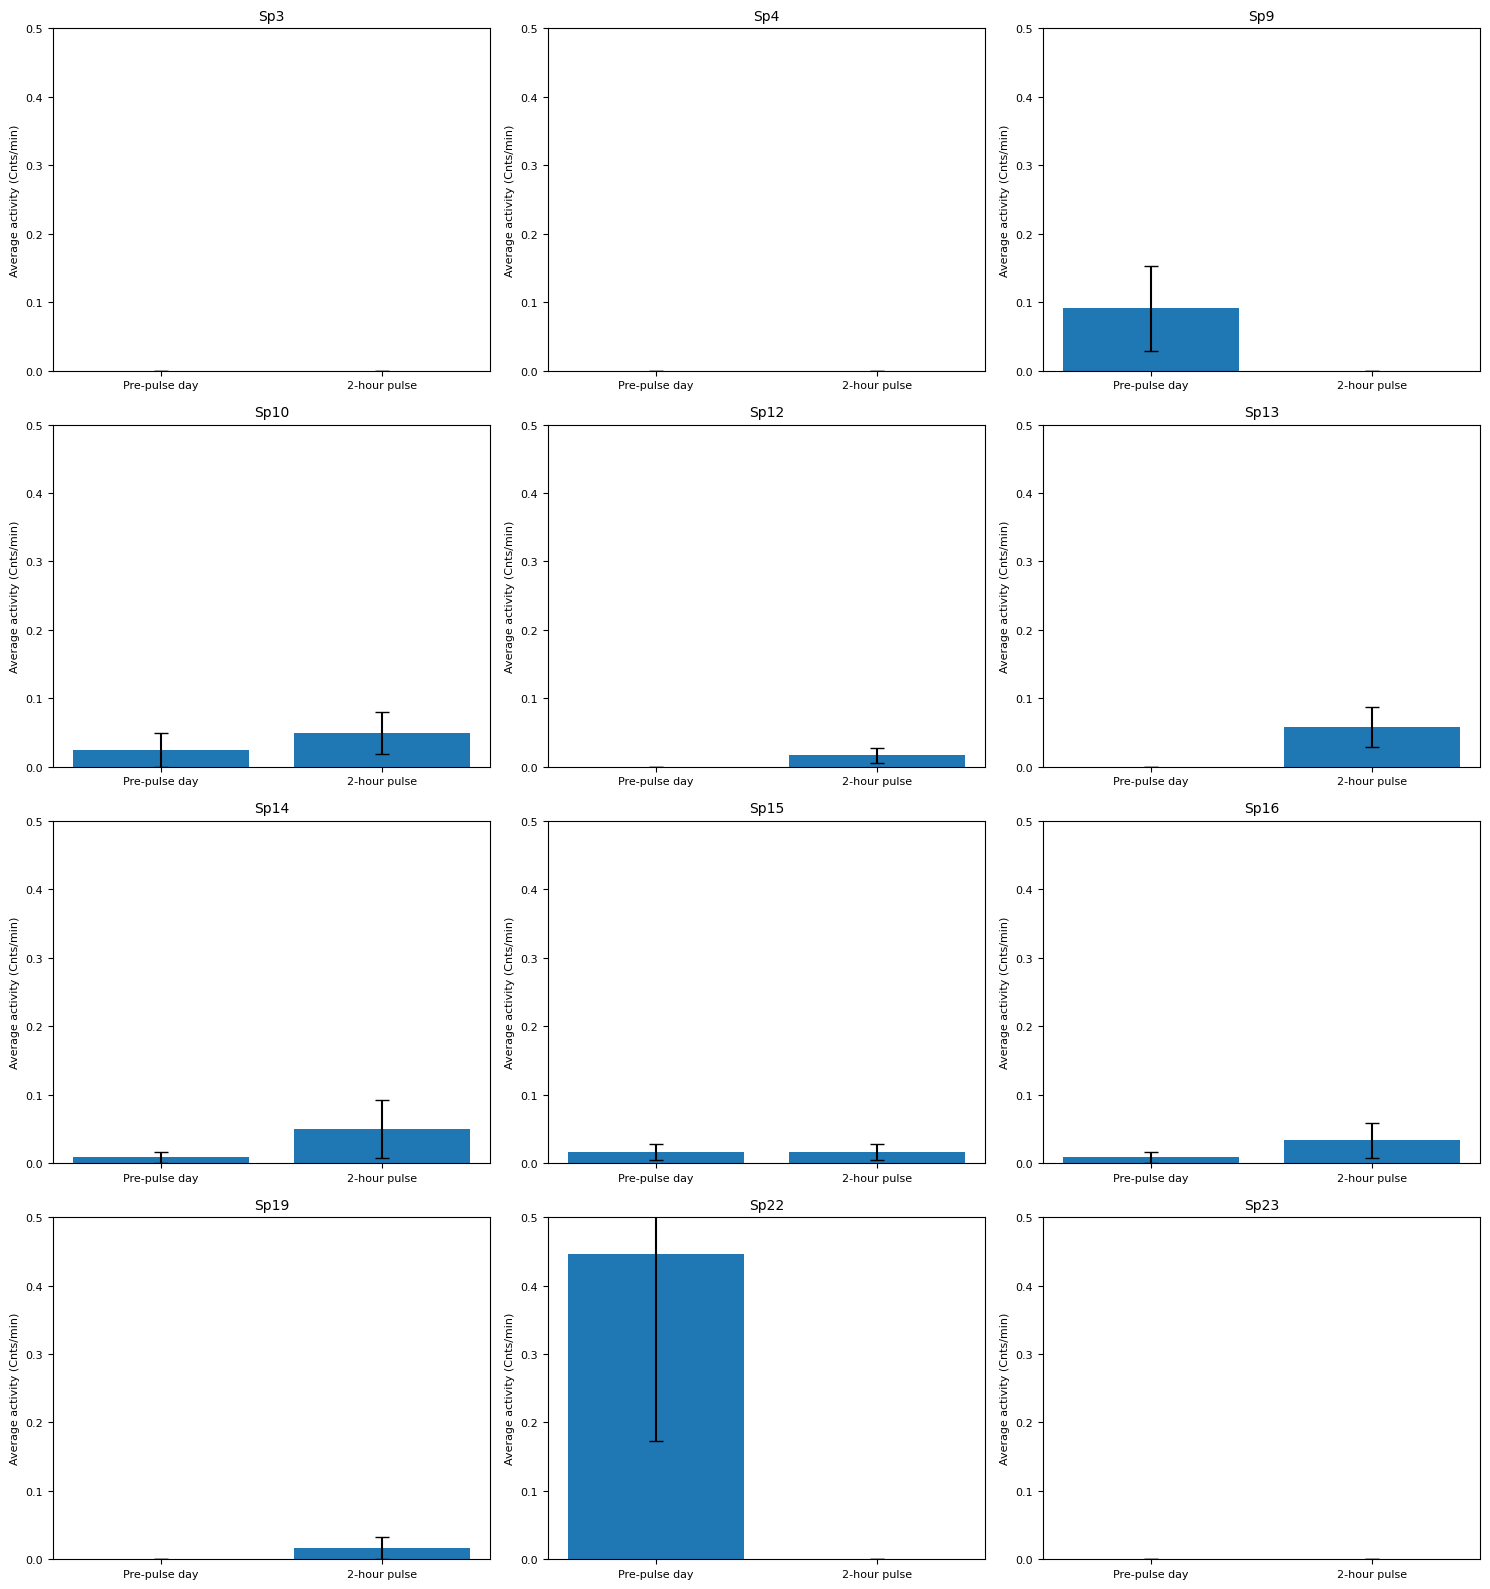

   Spider  Mean Pre-pulse Activity  Mean Pulse Activity
0     Sp3                 0.000000             0.000000
1     Sp4                 0.000000             0.000000
2     Sp9                 0.090909             0.000000
3    Sp10                 0.024793             0.049587
4    Sp12                 0.000000             0.016529
5    Sp13                 0.000000             0.057851
6    Sp14                 0.008264             0.049587
7    Sp15                 0.016529             0.016529
8    Sp16                 0.008264             0.033058
9    Sp19                 0.000000             0.016529
10   Sp22                 0.446281             0.000000
11   Sp23                 0.000000             0.000000


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def filter_and_compare_activity(df, day_pulse, day_pre_pulse, start_hour, end_hour):
    # Get the unique dates for the specified days
    pre_pulse_date = df.loc[df['Day'] == day_pre_pulse, 'Time'].dt.date.unique()[0]
    pulse_date = df.loc[df['Day'] == day_pulse, 'Time'].dt.date.unique()[0]
    
    # Construct start and end times with the correct dates
    start_time_pre_pulse = pd.to_datetime(f"{pre_pulse_date} {start_hour}")
    end_time_pre_pulse = pd.to_datetime(f"{pre_pulse_date} {end_hour}")
    start_time_pulse = pd.to_datetime(f"{pulse_date} {start_hour}")
    end_time_pulse = pd.to_datetime(f"{pulse_date} {end_hour}")
    
    # Filter the days
    day_pre = df.loc[df['Day'].between(day_pre_pulse - 2, day_pre_pulse)]  # Adjusted to pull days 2 through 4
    day_pulse = df.loc[df['Day'] == day_pulse]
    
    # Filter the time range for the specified days
    day_pre_filtered = day_pre[(day_pre['Time'] >= start_time_pre_pulse) & (day_pre['Time'] <= end_time_pre_pulse)]
    day_pulse_filtered = day_pulse[(day_pulse['Time'] >= start_time_pulse) & (day_pulse['Time'] <= end_time_pulse)]
    
    # Initialize a list to store mean activity data for each spider
    spider_means = []
    
    # Loop through each spider column
    spider_columns = [col for col in df.columns if col.startswith('Sp')]
    
    # Calculate the number of rows and columns for the grid
    num_spiders = len(spider_columns)
    num_cols = 3  # You can adjust this value based on how many columns you want in the grid
    num_rows = (num_spiders + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array to easily index it
    
    for idx, spider_col in enumerate(spider_columns):
        # Filter for the specific spider column
        spider_day_pre = day_pre_filtered[spider_col]
        spider_day_pulse = day_pulse_filtered[spider_col]
        
        # Calculate the mean activity and standard error of the mean
        mean_day_pre = spider_day_pre.mean()
        mean_day_pulse = spider_day_pulse.mean()
        sem_day_pre = spider_day_pre.sem()
        sem_day_pulse = spider_day_pulse.sem()
        
        # Append the results to the spider_means list
        spider_means.append((spider_col, mean_day_pre, mean_day_pulse))
        
        # Plot the results for each spider in the grid
        ax = axes[idx]
        days = ['Pre-pulse day', '2-hour pulse']
        means = [mean_day_pre, mean_day_pulse]
        errors = [sem_day_pre, sem_day_pulse]  # Standard error of the mean
        
        ax.bar(days, means, yerr=errors, capsize=5)
        ax.set_title(f'{spider_col}', fontsize=10)
        ax.set_ylabel('Average activity (Cnts/min)', fontsize=8)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(days, fontsize=8)
        ax.tick_params(axis='y', labelsize=8)
    
    # Remove any empty subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Find the maximum mean activity across all spiders
    max_mean_activity = max([mean for _, mean_pre, mean_pulse in spider_means for mean in (mean_pre, mean_pulse)])
    
    # Set the same y-axis range for all subplots
    for ax in axes:
        ax.set_ylim(0, 0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Create a DataFrame to store the means for all spiders
    means_df = pd.DataFrame(spider_means, columns=['Spider', 'Mean Pre-pulse Activity', 'Mean Pulse Activity'])
    
    return means_df

# Example usage
# Define the parameters
day_pulse = 5  # The day when the pulse occurred
day_pre_pulse = 4  # The day before the pulse
start_hour = '14:00:00'  # Replace with the desired start hour
end_hour = '16:00:00'  # Replace with the desired end hour
filename = 'Bar_graph_pre_pulse_and_2_hr_pulse_graph.png'

# Ensure 'Time' is in datetime format
merged_dfx1['Time'] = pd.to_datetime(merged_dfx1['Time'])
plt.savefig(filename)
plt.close()
# Call the function using the existing df
means_df = filter_and_compare_activity(merged_dfx1, day_pulse, day_pre_pulse, start_hour, end_hour)
print(means_df)


In [9]:
# filtering for a single day 
day1 = df[df['Day'] == 1]
count_mov = day1.filter(like="Sp")  
sum_count = count_mov.sum(axis=0) 
threshold = 0
filter_sum = sum_count > threshold 
columns_to_keep = filter_sum[filter_sum].index  
additional_columns = df.columns[:3]
all_columns_to_keep = list(additional_columns) + list(columns_to_keep)
filtered_df = day1[all_columns_to_keep]
display(filtered_df)

,Day,Time,Light,Sp3,Sp4,Sp5,Sp7,Sp9,Sp10,Sp11,...,Sp14,Sp15,Sp16,Sp17,Sp18,Sp19,Sp21,Sp22,Sp23,Sp25
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-03-20 11:04:00,1,2,2,15,8,5,0,0,...,0,0,1,0,4,3,1,3,0,2
2,1,2024-03-20 11:05:00,1,5,1,1,0,8,2,0,...,3,1,4,0,11,4,1,2,0,0
3,1,2024-03-20 11:06:00,1,3,1,3,0,8,1,1,...,5,0,1,0,1,3,1,5,0,0
4,1,2024-03-20 11:07:00,1,0,1,3,0,12,2,0,...,0,1,6,0,2,3,3,0,1,1
5,1,2024-03-20 11:08:00,1,0,1,4,0,10,0,0,...,4,0,3,0,5,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1,2024-03-20 23:55:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
773,1,2024-03-20 23:56:00,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
774,1,2024-03-20 23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0


In [10]:
#filtering for all days 
import pandas as pd

threshold = 0
additional_columns = df.columns[:3]
filtered_dfs = []

for day in range(1, 9):  
    day_df = df[df['Day'] == day] 
    count_mov = day_df.filter(like="Sp")  
    x = count_mov.sum(axis=0)  
    z = x > threshold  
    columns_to_keep = z[z].index 
    
    all_columns_to_keep = list(additional_columns) + list(columns_to_keep)
    filtered_df = day_df[all_columns_to_keep]
    filtered_dfs.append(filtered_df)

merged_df = pd.concat(filtered_dfs)
merged_df1 = merged_df.dropna(axis=1)
display(merged_df1)

,Day,Time,Light,Sp3,Sp4,Sp9,Sp10,Sp12,Sp13,Sp14,Sp15,Sp16,Sp18,Sp19,Sp21,Sp22,Sp23,Sp25
Index,,,,,,,,,,,,,,,,,,
1,1,2024-03-20 11:04:00,1,2,2,5,0,0,0,0,0,1,4,3,1,3,0,2
2,1,2024-03-20 11:05:00,1,5,1,8,2,0,0,3,1,4,11,4,1,2,0,0
3,1,2024-03-20 11:06:00,1,3,1,8,1,0,0,5,0,1,1,3,1,5,0,0
4,1,2024-03-20 11:07:00,1,0,1,12,2,0,0,0,1,6,2,3,3,0,1,1
5,1,2024-03-20 11:08:00,1,0,1,10,0,0,0,4,0,3,5,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,8,2024-03-27 10:23:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10041,8,2024-03-27 10:24:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10042,8,2024-03-27 10:25:00,1,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0


In [11]:
#function to filter 
import pandas as pd

def filter_and_merge(df, threshold=0):
    additional_columns = df.columns[:3]
    filtered_dfs = []

    for day in range(1, 9):  
        day_df = df[df['Day'] == day] 
        count_mov = day_df.filter(like="Sp")  
        x = count_mov.sum(axis=0)  
        z = x > threshold  
        columns_to_keep = z[z].index 
        
        all_columns_to_keep = list(additional_columns) + list(columns_to_keep)
        filtered_df = day_df[all_columns_to_keep]
        filtered_dfs.append(filtered_df)

    merged_df = pd.concat(filtered_dfs)
    merged_df1 = merged_df.dropna(axis=1)
    
    return merged_df1
    
merged_df = filter_and_merge(df)
display(merged_df)

,Day,Time,Light,Sp3,Sp4,Sp9,Sp10,Sp12,Sp13,Sp14,Sp15,Sp16,Sp18,Sp19,Sp21,Sp22,Sp23,Sp25
Index,,,,,,,,,,,,,,,,,,
1,1,2024-03-20 11:04:00,1,2,2,5,0,0,0,0,0,1,4,3,1,3,0,2
2,1,2024-03-20 11:05:00,1,5,1,8,2,0,0,3,1,4,11,4,1,2,0,0
3,1,2024-03-20 11:06:00,1,3,1,8,1,0,0,5,0,1,1,3,1,5,0,0
4,1,2024-03-20 11:07:00,1,0,1,12,2,0,0,0,1,6,2,3,3,0,1,1
5,1,2024-03-20 11:08:00,1,0,1,10,0,0,0,4,0,3,5,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,8,2024-03-27 10:23:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10041,8,2024-03-27 10:24:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10042,8,2024-03-27 10:25:00,1,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0


In [12]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['Steatoda A masking 02 pm.txt', 'Steatoda A masking 10 am.txt', 'Steatoda A masking 4 am.txt', 'Steatoda A masking midnight.txt', 'Steatoda B masking 04 pm.txt', 'Steatoda B masking 10 pm.txt', 'Steatoda B masking 12 pm.txt', 'Steatoda B maskng 2am.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)


FileNotFoundError: [Errno 2] No such file or directory: 'Steatoda A masking 02 pm.txt'

In [ ]:
filter_and_merge(df, threshold=0)

In [ ]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['Steatoda A masking 02 pm.txt', 'Steatoda A masking 10 am.txt', 'Steatoda A masking 4 am.txt', 'Steatoda A masking midnight.txt', 'Steatoda B masking 04 pm.txt', 'Steatoda B masking 10 pm.txt', 'Steatoda B masking 12 pm.txt', 'Steatoda B maskng 2am.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)


In [ ]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['Steatoda A masking 02 pm.txt', 'Steatoda A masking 10 am.txt', 'Steatoda A masking 4 am.txt', 'Steatoda A masking midnight.txt', 'Steatoda B masking 04 pm.txt', 'Steatoda B masking 10 pm.txt', 'Steatoda B masking 12 pm.txt', 'Steatoda B maskng 2am.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

def filter_and_merge(dataframes, threshold=0):
    merged_filtered_dfs = []
    for name, df in dataframes.items():
        additional_columns = df.columns[:3]
        filtered_dfs = []

        for day in range(1, 9):  
            day_df = df[df['Day'] == day] 
            count_mov = day_df.filter(like="Sp")  
            x = count_mov.sum(axis=0)  
            z = x > threshold  
            columns_to_keep = z[z].index 

            all_columns_to_keep = list(additional_columns) + list(columns_to_keep)
            filtered_df = day_df[all_columns_to_keep]
            filtered_dfs.append(filtered_df)

        merged_df = pd.concat(filtered_dfs)
        merged_df1 = merged_df.dropna(axis=1)
        merged_filtered_dfs.append(merged_df1)
    
    final_merged_df = pd.concat(merged_filtered_dfs)
    return final_merged_df

files = [
    'Steatoda A masking 02 pm.txt', 'Steatoda A masking 10 am.txt',
    'Steatoda A masking 4 am.txt', 'Steatoda A masking midnight.txt',
    'Steatoda B masking 04 pm.txt', 'Steatoda B masking 10 pm.txt',
    'Steatoda B masking 12 pm.txt', 'Steatoda B maskng 2am.txt'
]

dataframes = process_files(files)

final_merged_df = filter_and_merge(dataframes, threshold=0)

display(final_merged_df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetimelimit
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

def filter_and_merge(dataframes, threshold=0):
    filtered_dataframes = {}
    for name, df in dataframes.items():
        additional_columns = df.columns[:3]
        filtered_dfs = []

        for day in range(1, 9):  
            day_df = df[df['Day'] == day] 
            count_mov = day_df.filter(like="Sp")  
            x = count_mov.sum(axis=0)  
            z = x > threshold  
            columns_to_keep = z[z].index 

            all_columns_to_keep = list(additional_columns) + list(columns_to_keep)
            filtered_df = day_df[all_columns_to_keep]
            filtered_dfs.append(filtered_df)

        merged_df = pd.concat(filtered_dfs)
        merged_df1 = merged_df.dropna(axis=1)
        filtered_dataframes[name] = merged_df1
    
    return filtered_dataframes

# List of files to process
files = [
    'Steatoda A masking 02 pm.txt', 'Steatoda A masking 10 am.txt',
    'Steatoda A masking 4 am.txt', 'Steatoda A masking midnight.txt',
    'Steatoda B masking 04 pm.txt', 'Steatoda B masking 10 pm.txt',
    'Steatoda B masking 12 pm.txt', 'Steatoda B maskng 2am.txt'
]

dataframes = process_files(files)

filtered_dataframes = filter_and_merge(dataframes, threshold=0)

for name, df in filtered_dataframes.items():
    print(f"{name}:")
    display(df)
